# To Predict Flight Fare

In [1]:
#Importing The Packages

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading The Data

In [4]:
Data=pd.read_excel('Flight_Fare.xlsx')

In [5]:
#Checking The Data

In [6]:
Data.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [7]:
# Loading Dataset Information

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
#Checking The Null Values

In [10]:
Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
#Dropping The Nan Values

In [12]:
Data.dropna(inplace=True)

In [13]:
Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
Data.shape

(10682, 11)

In [15]:
#For Statistical Values of Dependent Variable

In [16]:
Data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [17]:
Data['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → BBI → HYD                   1
BOM → UDR → DEL → HYD             1
BLR → HBX → BOM → AMD → DEL       1
CCU → IXZ → MAA → BLR             1
CCU → VTZ → BLR                   1
Name: Route, Length: 128, dtype: int64

# EDA

In [18]:
#Converting String Values to DateTime Columns

In [19]:
Data['Day_Of_Journey']=pd.to_datetime(Data['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [20]:
Data['Month_Of_Journey']=pd.to_datetime(Data['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [21]:
Data['Year_Of_Journey']=pd.to_datetime(Data['Date_of_Journey'],format='%d/%m/%Y').dt.year

In [22]:
Data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_Of_Journey,Month_Of_Journey,Year_Of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,2019


In [23]:
#Dropping The Date_Of_Journey Column

In [24]:
Data.drop(columns=['Date_of_Journey'],inplace=True)

In [25]:
Data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_Of_Journey,Month_Of_Journey,Year_Of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [26]:
#Extracting Values From Departure Time 

In [27]:
Data['Departure_Hour']=pd.to_datetime(Data['Dep_Time']).dt.hour

In [28]:
Data['Departure_Minute']=pd.to_datetime(Data['Dep_Time']).dt.minute

In [29]:
Data.drop(['Dep_Time'],axis=1,inplace=True)

In [30]:
Data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_Of_Journey,Month_Of_Journey,Year_Of_Journey,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [31]:
#Extracting Values From Arrival Time

In [32]:
Data['Arrival_Hour']=pd.to_datetime(Data['Arrival_Time']).dt.hour

In [33]:
Data['Arrival_Minute']=pd.to_datetime(Data['Arrival_Time']).dt.minute

In [34]:
Data.drop(['Arrival_Time'],axis=1,inplace=True)

In [35]:
Data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_Of_Journey,Month_Of_Journey,Year_Of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30


In [36]:
#Converting Duration Column into List

In [37]:
duration=list(Data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: 
             duration[i]=duration[i] + ' 0m' 
        else:
             duration[i]='0h '+ duration[i]

In [38]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[-1][0:-1]

In [39]:
Data['Duration_Hour']=Data['Duration'].apply(hour)
Data['Duration_Minute']=Data['Duration'].apply(minutes)

In [40]:
Data.drop(['Duration'],axis=1,inplace=True)

In [43]:
Data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_Of_Journey,Month_Of_Journey,Year_Of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


### Handling Categorical Data

In [79]:
#Airline with respect to Price

In [45]:
Data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

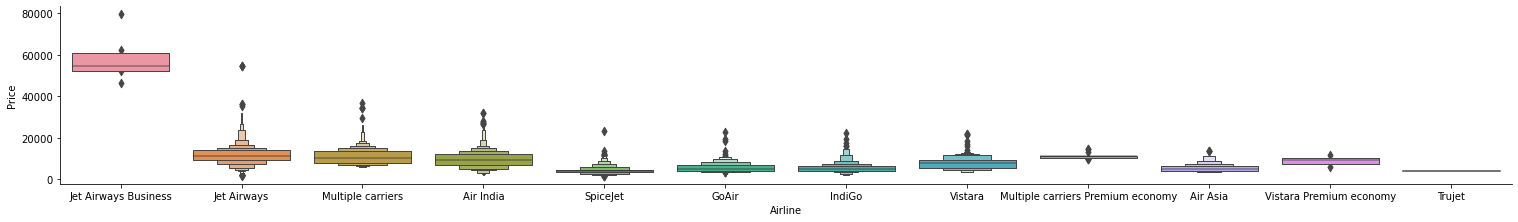

In [98]:
sns.catplot(x='Airline',y='Price',data=Data.sort_values('Price',ascending=False),kind='boxen',height=3,aspect=7)
plt.show()

In [68]:
# As the Data is not in Order Using One Hot Encoder

In [69]:
Airline=Data[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

In [72]:
Airline.head(10)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Source with respect to Price

In [73]:
Data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

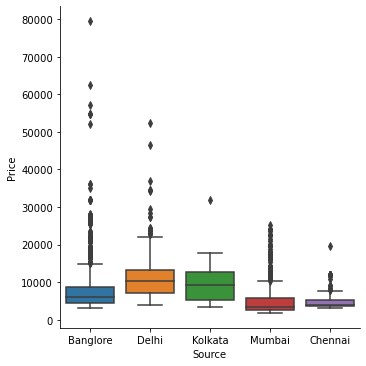

In [100]:
sns.catplot(x='Source',y='Price',data=Data.sort_values('Price',ascending=False),kind='box')
plt.show()

In [105]:
Source=Data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)

In [106]:
Source.head(6)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [107]:
#Destination with respect to Price

In [109]:
Data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

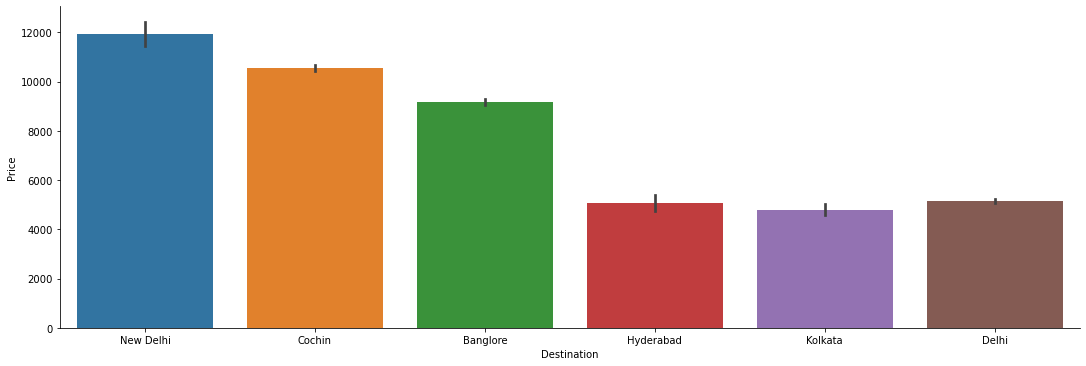

In [111]:
sns.catplot(x='Destination',y='Price',data=Data.sort_values('Price',ascending=False),kind='bar',height=5,aspect=3)
plt.show()

In [114]:
Destination=Data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)

In [115]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [118]:
Data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [120]:
Data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [121]:
#Route and Total Stops are similar type of information and Additional info can not affect the Dependent variable

In [123]:
Data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [124]:
Data.head(6)

,Airline,Source,Destination,Total_Stops,Price,Day_Of_Journey,Month_Of_Journey,Year_Of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,non-stop,3873,24,6,2019,9,0,11,25,2,25


In [126]:
Data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [127]:
#Replacing the Values with Integers

In [130]:
Data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [131]:
Data.head(6)

,Airline,Source,Destination,Total_Stops,Price,Day_Of_Journey,Month_Of_Journey,Year_Of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,11,25,2,25


In [159]:
Data

,Airline,Source,Destination,Total_Stops,Price,Day_Of_Journey,Month_Of_Journey,Year_Of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,3
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


In [179]:
Final_data=pd.concat([Data,Airline,Source,Destination],axis=1)

In [180]:
Final_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_Of_Journey,Month_Of_Journey,Year_Of_Journey,Departure_Hour,Departure_Minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,...,0,0,0,0,0,0,0,0,0,1


In [182]:
Final_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [183]:
Final_data.head()

,Total_Stops,Price,Day_Of_Journey,Month_Of_Journey,Year_Of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [185]:
Final_data.shape

(10682, 31)

### Feature Selection

In [186]:
Final_data.columns

Index(['Total_Stops', 'Price', 'Day_Of_Journey', 'Month_Of_Journey',
       'Year_Of_Journey', 'Departure_Hour', 'Departure_Minute', 'Arrival_Hour',
       'Arrival_Minute', 'Duration_Hour', 'Duration_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [177]:
#Independent Varible

In [187]:
X=Final_data.drop('Price',axis=1)

In [189]:
X.head()

,Total_Stops,Day_Of_Journey,Month_Of_Journey,Year_Of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,19,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [195]:
#Dependent Variable

In [190]:
Y=Final_data.iloc[:,1]

In [191]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

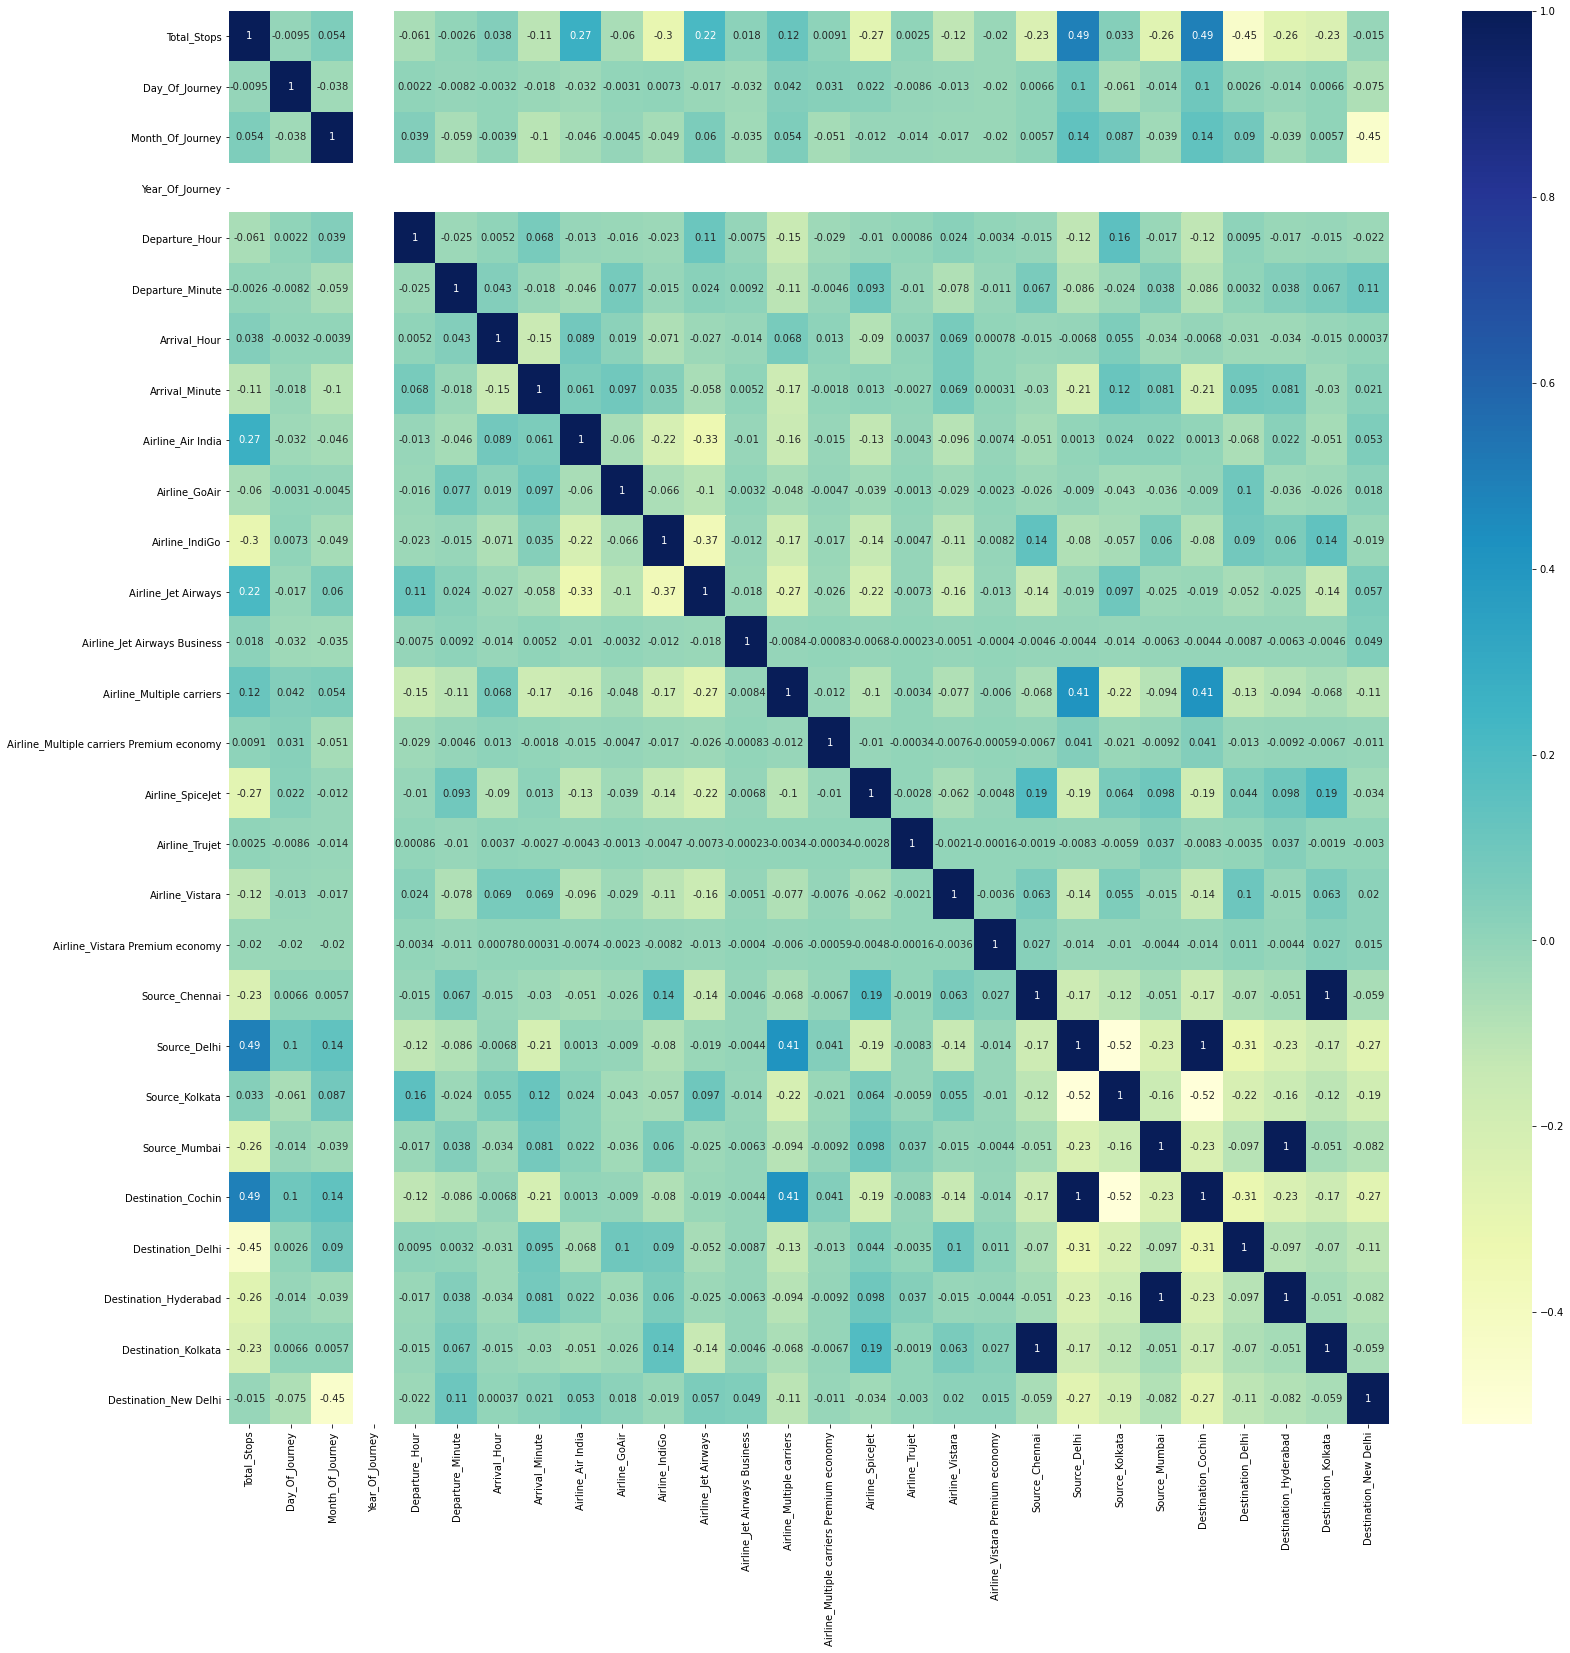

In [197]:
plt.figure(figsize=(26,26))
sns.heatmap(X.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [214]:
#Using ExtraTreesRegressor

In [206]:
select=ExtraTreesRegressor()
select.fit(X,Y)

ExtraTreesRegressor()

In [207]:
print(select.feature_importances_)

[2.49894425e-01 1.43623116e-01 5.32782612e-02 0.00000000e+00
 2.37451895e-02 2.12490028e-02 2.78583810e-02 2.00557531e-02
 1.08241101e-01 1.78360651e-02 8.98859795e-03 1.78213148e-03
 1.62479001e-02 1.39742157e-01 6.68487614e-02 1.94587289e-02
 8.71893744e-04 2.79236227e-03 7.99838760e-05 5.12136701e-03
 8.26770656e-05 5.13003735e-04 9.81664170e-03 3.33226413e-03
 6.74492887e-03 8.33568050e-03 1.30905646e-02 4.99230193e-03
 4.41452581e-04 2.49353060e-02]


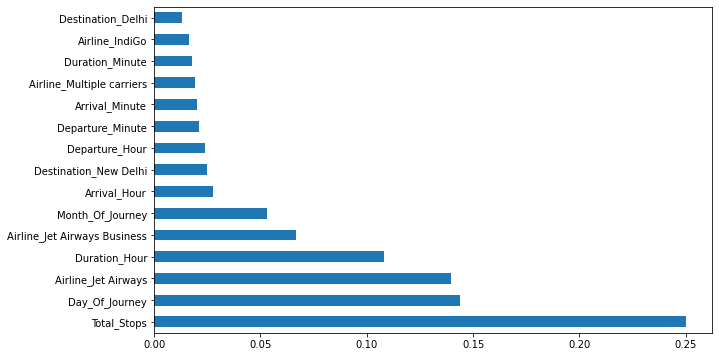

In [218]:
plt.figure(figsize=(10,6))
feature=pd.Series(select.feature_importances_,index=X.columns)
feature.nlargest(15).plot(kind='barh')
plt.show()

### Model  Selection and Building 

In [223]:
# Splitting the Data

In [222]:
from sklearn.model_selection import train_test_split

In [224]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=10)

In [226]:
x_train.shape

(8545, 30)

In [227]:
x_test.shape

(2137, 30)

In [228]:
# Using RandomForestRegressor

In [230]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [231]:
y_pred=model.predict(x_test)

In [232]:
model.score(x_train,y_train)

0.953993260549125

In [234]:
model.score(x_test,y_test)

0.8002217457366134

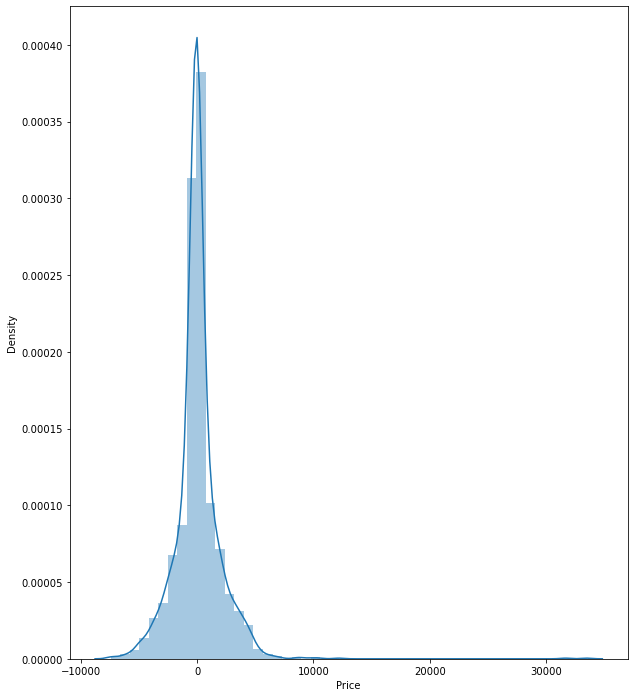

In [254]:
plt.figure(figsize=(10,12))
sns.distplot(y_test-y_pred)
plt.show()

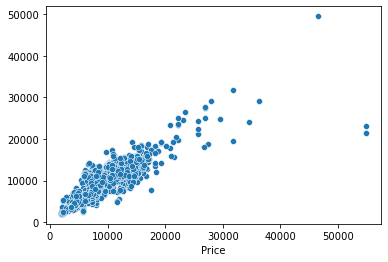

In [258]:
sns.scatterplot(y_test,y_pred)
plt.show()

### Evaluation 

In [259]:
print('MSE',metrics.mean_squared_error(y_test,y_pred))

MSE 4317159.283550751


In [260]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

MAE 1205.5725059154956


In [261]:
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE 2077.777486534771


In [262]:
metrics.r2_score(y_test,y_pred)

0.8002217457366134

### Hyperparameter Tuning 

In [264]:
#Using RandomizedSearchCV

In [266]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [267]:
grid={'n_estimators':n_estimators,
      'max_features':max_features,
      'max_depth':max_depth,
      'min_samples_split':min_samples_split,
      'min_samples_leaf':min_samples_leaf}

In [270]:
random=RandomizedSearchCV(estimator=model,param_distributions=grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1,random_state=10)

In [271]:
random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.2s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10, total=  26.9s
[CV] n_estimators=1200, min_samples_split

[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   5.3s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   5.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   6.2s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   5.2s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   5.2s
[CV] n_estimators=100, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=10, scoring='neg_mean_squared_error',
                   verbose=2)

In [272]:
random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [275]:
predict=random.predict(x_test)

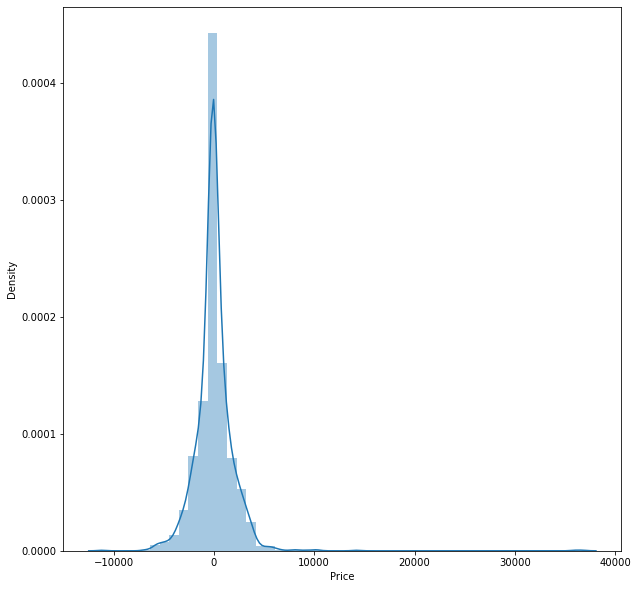

In [277]:
plt.figure(figsize=(10,10))
sns.distplot(y_test-predict)
plt.show()

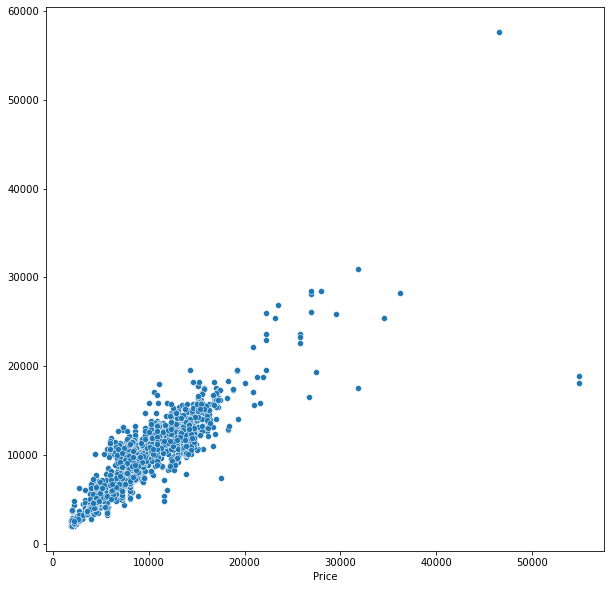

In [280]:
plt.figure(figsize=(10,10))
sns.scatterplot(y_test,predict)
plt.show()

### Evaluation

In [281]:
print('MSE',metrics.mean_squared_error(y_test,predict))

MSE 4175723.389483718


In [282]:
print('MAE',metrics.mean_absolute_error(y_test,predict))

MAE 1166.1671994690118


In [283]:
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predict)))

RMSE 2043.458683087015


### Save the Model

In [289]:
File=open('flight_model.pkl','wb')
pickle.dump(random,File)

In [290]:
save=open('flight_model.pkl','rb')
rsf_model=pickle.load(save)

In [291]:
prediction=rsf_model.predict(x_test)

In [292]:
metrics.r2_score(y_test,prediction)

0.8067667477045866